In [188]:
import sqlite3
import pandas as pd
import datetime
import ast
import numpy as np
import os

In [189]:
os.chdir('D:\Coding\Python\Subscriber Cancellations Data Pipeline\dev')

In [190]:
con = sqlite3.connect('cademycode.db')
curs = con.cursor()
tables = curs.execute("""SELECT name FROM  sqlite_master WHERE type='table'""").fetchall()
tables


[('cademycode_students',),
 ('cademycode_courses',),
 ('cademycode_student_jobs',)]

In [191]:
students = pd.read_sql_query('SELECT * FROM cademycode_students', con)
courses = pd.read_sql_query('SELECT * FROM cademycode_courses', con)
student_jobs = pd.read_sql_query('SELECT * FROM cademycode_student_jobs', con)

In [192]:
print(f'Students: {len(students)}')
print(f'Courses: {len(courses)}')
print(f'Student jobs: {len(student_jobs)}')

Students: 5000
Courses: 10
Student jobs: 13


In [193]:
students.head()

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64


In [194]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    5000 non-null   int64 
 1   name                    5000 non-null   object
 2   dob                     5000 non-null   object
 3   sex                     5000 non-null   object
 4   contact_info            5000 non-null   object
 5   job_id                  4995 non-null   object
 6   num_course_taken        4749 non-null   object
 7   current_career_path_id  4529 non-null   object
 8   time_spent_hrs          4529 non-null   object
dtypes: int64(1), object(8)
memory usage: 351.7+ KB


In [195]:
students[students.isnull().any(axis=1)]

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs
15,16,Norene Dalton,1976-04-30,F,"{""mailing_address"": ""130 Wishing Essex, Branch...",6.0,0.0,None,None
19,20,Sofia van Steenbergen,1990-02-21,N,"{""mailing_address"": ""634 Clear Barn Dell, Beam...",7.0,13.0,None,None
25,26,Doug Browning,1970-06-08,M,"{""mailing_address"": ""P.O. Box 15845, Devine, F...",7.0,None,5.0,1.92
26,27,Damon Schrauwen,1953-10-31,M,"{""mailing_address"": ""P.O. Box 84659, Maben, Ge...",4.0,None,10.0,3.73
30,31,Christoper Warner,1989-12-28,M,"{""mailing_address"": ""556 Stony Highlands, Drai...",2.0,5.0,None,None
...,...,...,...,...,...,...,...,...,...
4948,4949,Dewitt van Malsem,1949-03-08,M,"{""mailing_address"": ""423 Course Trail, Wilmot,...",4.0,7.0,None,None
4956,4957,Todd Stamhuis,1961-06-15,M,"{""mailing_address"": ""251 Grand Rose Underpass,...",7.0,8.0,None,None
4974,4975,Jorge Creelman,1944-11-24,M,"{""mailing_address"": ""919 Well Overpass, Linden...",2.0,15.0,None,None
4980,4981,Brice Franklin,1946-12-01,M,"{""mailing_address"": ""947 Panda Way, New Bedfor...",4.0,None,5.0,8.66


In [196]:
now = pd.to_datetime('now')
students['age'] = ((now - pd.to_datetime(students['dob'])).dt.days / 365).astype(int)
students['age_group'] = ((students['age']/10)).astype(int)*10
students

,uuid,name,dob,sex,contact_info,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group
0,1,Annabelle Avery,1943-07-03,F,"{""mailing_address"": ""303 N Timber Key, Irondal...",7.0,6.0,1.0,4.99,80,80
1,2,Micah Rubio,1991-02-07,M,"{""mailing_address"": ""767 Crescent Fair, Shoals...",7.0,5.0,8.0,4.4,32,30
2,3,Hosea Dale,1989-12-07,M,"{""mailing_address"": ""P.O. Box 41269, St. Bonav...",7.0,8.0,8.0,6.74,33,30
3,4,Mariann Kirk,1988-07-31,F,"{""mailing_address"": ""517 SE Wintergreen Isle, ...",6.0,7.0,9.0,12.31,35,30
4,5,Lucio Alexander,1963-08-31,M,"{""mailing_address"": ""18 Cinder Cliff, Doyles b...",7.0,14.0,3.0,5.64,60,60
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,Quentin van Harn,1967-07-07,N,"{""mailing_address"": ""591 Blue Berry, Coulee, I...",5.0,5.0,2.0,13.82,56,50
4996,4997,Alejandro van der Sluijs,1964-11-03,M,"{""mailing_address"": ""30 Iron Divide, Pewaukee ...",4.0,13.0,1.0,7.86,58,50
4997,4998,Brock Mckenzie,2004-11-25,M,"{""mailing_address"": ""684 Rustic Rest Avenue, C...",8.0,10.0,3.0,12.1,18,10
4998,4999,Donnetta Dillard,1943-02-12,N,"{""mailing_address"": ""900 Indian Oval, Euclid, ...",3.0,6.0,5.0,14.86,80,80


In [197]:
type(students['contact_info'][0])

str

In [198]:
students['contact_info'] = students['contact_info'].apply(lambda x: ast.literal_eval(x))
type(students['contact_info'][0])

dict

In [199]:
expand_contact = pd.json_normalize(students['contact_info'])
students = pd.concat([students.drop('contact_info', axis=1), expand_contact], axis=1)
students.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,mailing_address,email
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80,80,"303 N Timber Key, Irondale, Wisconsin, 84736",annabelle_avery9376@woohoo.com
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.4,32,30,"767 Crescent Fair, Shoals, Indiana, 37439",rubio6772@hmail.com
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,33,30,"P.O. Box 41269, St. Bonaventure, Virginia, 83637",hosea_dale8084@coldmail.com
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35,30,"517 SE Wintergreen Isle, Lane, Arkansas, 82242",kirk4005@hmail.com
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60,60,"18 Cinder Cliff, Doyles borough, Rhode Island,...",alexander9810@hmail.com


In [200]:
split_address = students.mailing_address.str.split(',', expand=True)
split_address.columns = ['street', 'city', 'state', 'zip_code']
students = pd.concat([students.drop('mailing_address', axis=1), split_address], axis=1)


In [201]:
students['job_id'] = students['job_id'].astype(float)
students['current_career_path_id'] = students['current_career_path_id'].astype(float)
students['num_course_taken'] = students['num_course_taken'].astype(float)
students['time_spent_hrs'] = students['time_spent_hrs'].astype(float)
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    5000 non-null   int64  
 1   name                    5000 non-null   object 
 2   dob                     5000 non-null   object 
 3   sex                     5000 non-null   object 
 4   job_id                  4995 non-null   float64
 5   num_course_taken        4749 non-null   float64
 6   current_career_path_id  4529 non-null   float64
 7   time_spent_hrs          4529 non-null   float64
 8   age                     5000 non-null   int32  
 9   age_group               5000 non-null   int32  
 10  email                   5000 non-null   object 
 11  street                  5000 non-null   object 
 12  city                    5000 non-null   object 
 13  state                   5000 non-null   object 
 14  zip_code                5000 non-null   

In [202]:
missing_course_taken = students[students['num_course_taken'].isnull()]
missing_course_taken

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code
25,26,Doug Browning,1970-06-08,M,7.0,NaN,5.0,1.92,53,50,doug7761@inlook.com,P.O. Box 15845,Devine,Florida,23097
26,27,Damon Schrauwen,1953-10-31,M,4.0,NaN,10.0,3.73,69,60,damon9864@woohoo.com,P.O. Box 84659,Maben,Georgia,66137
51,52,Alisa Neil,1977-05-28,F,5.0,NaN,8.0,22.86,46,40,alisa9616@inlook.com,16 View Annex,Mosses,North Dakota,25748
70,71,Chauncey Hooper,1962-04-07,M,3.0,NaN,3.0,3.97,61,60,chauncey6352@woohoo.com,955 Dewy Flat,Slaughterville,South Carolina,22167
80,81,Ellyn van Heest,1984-06-28,F,3.0,NaN,10.0,12.39,39,30,ellyn_vanheest8375@hmail.com,872 Cider Glade,Chicken,Delaware,42689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,4890,Tegan Cochran,1970-11-08,F,5.0,NaN,8.0,22.75,52,50,tegan130@inlook.com,106 Sunny Nook,Vernal,Georgia,10769
4898,4899,Ruthann Oliver,1998-05-22,F,3.0,NaN,7.0,21.27,25,20,ruthann1124@woohoo.com,644 Merry Island,Green Valley,Wyoming,91273
4914,4915,Ernest Holmes,1995-03-11,M,7.0,NaN,9.0,26.50,28,20,ernest_holmes505@hmail.com,872 Wintergreen Harbor,Gallitzin borough,Maine,50103
4980,4981,Brice Franklin,1946-12-01,M,4.0,NaN,5.0,8.66,76,70,brice9741@coldmail.com,947 Panda Way,New Bedford village,Vermont,31232


<Axes: xlabel='sex'>

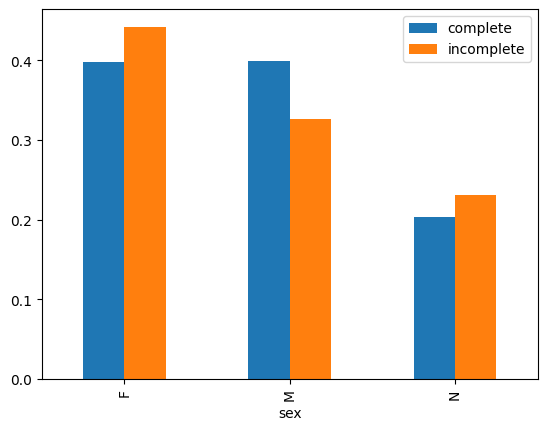

In [203]:
sg = (students.groupby('sex')['uuid'].count()/len(students)).rename('complete')
mg = (missing_course_taken.groupby('sex')['uuid'].count()/len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg, mg], axis=1)
df.plot.bar()

<Axes: xlabel='job_id'>

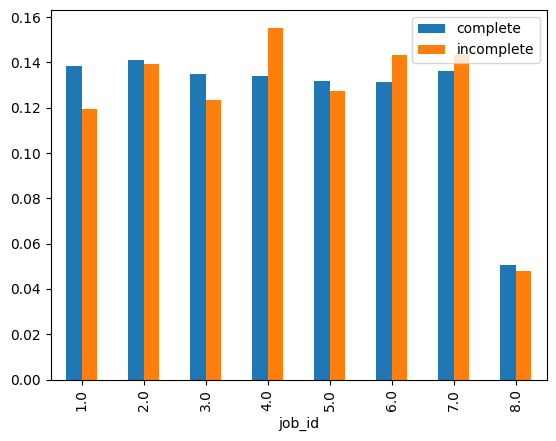

In [204]:
sg = (students.groupby('job_id')['uuid'].count()/len(students)).rename('complete')
mg = (missing_course_taken.groupby('job_id')['uuid'].count()/len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg, mg], axis=1)
df.plot.bar()

<Axes: xlabel='age_group'>

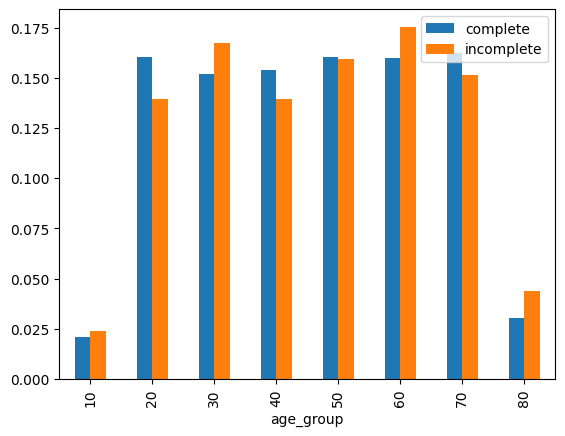

In [205]:
sg = (students.groupby('age_group')['uuid'].count() / len(students)).rename('complete')
mg = (missing_course_taken.groupby('age_group')['uuid'].count() / len(missing_course_taken)).rename('incomplete')
df = pd.concat([sg,mg], axis=1)
df.plot.bar()

In [206]:
missing_data = pd.DataFrame()
missing_data = pd.concat([missing_data, missing_course_taken], axis=1)
students = students.dropna(subset=['num_course_taken'])
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 25 to 4985
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    251 non-null    int64  
 1   name                    251 non-null    object 
 2   dob                     251 non-null    object 
 3   sex                     251 non-null    object 
 4   job_id                  251 non-null    float64
 5   num_course_taken        0 non-null      float64
 6   current_career_path_id  231 non-null    float64
 7   time_spent_hrs          231 non-null    float64
 8   age                     251 non-null    int32  
 9   age_group               251 non-null    int32  
 10  email                   251 non-null    object 
 11  street                  251 non-null    object 
 12  city                    251 non-null    object 
 13  state                   251 non-null    object 
 14  zip_code                251 non-null    objec

In [207]:
missing_job_id = students[students['job_id'].isnull()]
missing_job_id

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code
162,163,Glen Riley,2002-08-22,M,NaN,8.0,3.0,5.70,21,20,glen_riley4484@hmail.com,P.O. Box 37267,Cornlea village,Tennessee,19192
757,758,Mercedez Vorberg,2002-03-25,F,NaN,15.0,4.0,4.14,21,20,mercedez6297@woohoo.com,284 Cedar Seventh,Virden village,Washington,60489
854,855,Kurt Ho,2002-05-29,M,NaN,0.0,8.0,23.72,21,20,ho6107@inlook.com,P.O. Box 27254,Olin,New Hampshire,60067
1029,1030,Penny Gaines,2002-03-01,N,NaN,15.0,4.0,16.25,21,20,gaines2897@hmail.com,138 Misty Vale,Stockton borough,West Virginia,53630
1542,1543,Frederick Reilly,2002-11-13,M,NaN,7.0,9.0,21.32,20,20,frederick_reilly6971@woohoo.com,P.O. Box 40769,Quakervillage,Maryland,96218


In [208]:
missing_data = pd.concat([missing_data, missing_job_id])
students = students.dropna(subset='job_id')
students.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4293 non-null   float64
 7   time_spent_hrs          4293 non-null   float64
 8   age                     4744 non-null   int32  
 9   age_group               4744 non-null   int32  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   objec

In [209]:
missing_career_path_id = students[students['current_career_path_id'].isnull()]
missing_career_path_id.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code
15,16,Norene Dalton,1976-04-30,F,6.0,0.0,NaN,NaN,47,40,norene_dalton9509@hmail.com,130 Wishing Essex,Branch,Ohio,13616
19,20,Sofia van Steenbergen,1990-02-21,N,7.0,13.0,NaN,NaN,33,30,vansteenbergen8482@inlook.com,634 Clear Barn Dell,Beaman,Georgia,33288
30,31,Christoper Warner,1989-12-28,M,2.0,5.0,NaN,NaN,33,30,warner5906@coldmail.com,556 Stony Highlands,Drain,Illinois,01973
49,50,Antony Horne,1996-05-29,M,3.0,2.0,NaN,NaN,27,20,antony577@coldmail.com,P.O. Box 78685,Lenox,Texas,15516
54,55,Omar Bunk,1955-11-08,M,3.0,14.0,NaN,NaN,67,60,omar1245@coldmail.com,445 Dale Hollow,Vermont village,South Carolina,28329


In [210]:
missing_career_path_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 451 entries, 15 to 4974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    451 non-null    int64  
 1   name                    451 non-null    object 
 2   dob                     451 non-null    object 
 3   sex                     451 non-null    object 
 4   job_id                  451 non-null    float64
 5   num_course_taken        451 non-null    float64
 6   current_career_path_id  0 non-null      float64
 7   time_spent_hrs          0 non-null      float64
 8   age                     451 non-null    int32  
 9   age_group               451 non-null    int32  
 10  email                   451 non-null    object 
 11  street                  451 non-null    object 
 12  city                    451 non-null    object 
 13  state                   451 non-null    object 
 14  zip_code                451 non-null    objec

In [211]:
students['current_career_path_id'].unique()

array([ 1.,  8.,  9.,  3.,  6., 10.,  5., nan,  4.,  7.,  2.])

In [212]:
students['current_career_path_id'].fillna(0, inplace=True)
students['time_spent_hrs'].fillna(0, inplace=True)
students.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4744 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4744 non-null   float64
 7   time_spent_hrs          4744 non-null   float64
 8   age                     4744 non-null   int32  
 9   age_group               4744 non-null   int32  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   objec

In [213]:
courses

,career_path_id,career_path_name,hours_to_complete
0,1,data scientist,20
1,2,data engineer,20
2,3,data analyst,12
3,4,software engineering,25
4,5,backend engineer,18
5,6,frontend engineer,20
6,7,iOS developer,27
7,8,android developer,27
8,9,machine learning engineer,35
9,10,ux/ui designer,15


In [218]:
courses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   career_path_id     11 non-null     int64 
 1   career_path_name   11 non-null     object
 2   hours_to_complete  11 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 352.0+ bytes


In [215]:
not_available = {'career_path_id': 0,
                 'career_path_name': 'not available',
                 'hours_to_complete': 0
                 }
courses.loc[len(courses)] = not_available
courses


,career_path_id,career_path_name,hours_to_complete
0,1,data scientist,20
1,2,data engineer,20
2,3,data analyst,12
3,4,software engineering,25
4,5,backend engineer,18
5,6,frontend engineer,20
6,7,iOS developer,27
7,8,android developer,27
8,9,machine learning engineer,35
9,10,ux/ui designer,15


In [221]:
student_jobs


,job_id,job_category,avg_salary
0,1,analytics,86000
1,2,engineer,101000
2,3,software developer,110000
3,4,creative,66000
4,5,financial services,135000
5,6,education,61000
6,7,HR,80000
7,8,student,10000
8,9,healthcare,120000
9,0,other,80000


In [223]:
student_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   job_id        13 non-null     int64 
 1   job_category  13 non-null     object
 2   avg_salary    13 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 440.0+ bytes


In [224]:
student_jobs.drop_duplicates(inplace=True)
student_jobs

,job_id,job_category,avg_salary
0,1,analytics,86000
1,2,engineer,101000
2,3,software developer,110000
3,4,creative,66000
4,5,financial services,135000
5,6,education,61000
6,7,HR,80000
7,8,student,10000
8,9,healthcare,120000
9,0,other,80000


In [230]:
cademy_final_df = students.merge(courses, left_on='current_career_path_id', right_on='career_path_id', how='left')
cademy_final_df = cademy_final_df.merge(student_jobs, on='job_id', how='left')
cademy_final_df.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code,career_path_id,career_path_name,hours_to_complete,job_category,avg_salary
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80,80,annabelle_avery9376@woohoo.com,303 N Timber Key,Irondale,Wisconsin,84736,1,data scientist,20,HR,80000
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.40,32,30,rubio6772@hmail.com,767 Crescent Fair,Shoals,Indiana,37439,8,android developer,27,HR,80000
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,33,30,hosea_dale8084@coldmail.com,P.O. Box 41269,St. Bonaventure,Virginia,83637,8,android developer,27,HR,80000
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35,30,kirk4005@hmail.com,517 SE Wintergreen Isle,Lane,Arkansas,82242,9,machine learning engineer,35,education,61000
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60,60,alexander9810@hmail.com,18 Cinder Cliff,Doyles borough,Rhode Island,73737,3,data analyst,12,HR,80000


In [232]:
cademy_final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4744 non-null   float64
 7   time_spent_hrs          4744 non-null   float64
 8   age                     4744 non-null   int32  
 9   age_group               4744 non-null   int32  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   

In [237]:
con = sqlite3.connect('cademycode_cleansed.db')
cademy_final_df.to_sql('cademycode_cleansed', con, if_exists='replace', index=False)
db_df = pd.read_sql_query(""" SELECT * FROM cademycode_cleansed """, con)
db_df.head()



,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code,career_path_id,career_path_name,hours_to_complete,job_category,avg_salary
0,1,Annabelle Avery,1943-07-03,F,7.0,6.0,1.0,4.99,80,80,annabelle_avery9376@woohoo.com,303 N Timber Key,Irondale,Wisconsin,84736,1,data scientist,20,HR,80000
1,2,Micah Rubio,1991-02-07,M,7.0,5.0,8.0,4.40,32,30,rubio6772@hmail.com,767 Crescent Fair,Shoals,Indiana,37439,8,android developer,27,HR,80000
2,3,Hosea Dale,1989-12-07,M,7.0,8.0,8.0,6.74,33,30,hosea_dale8084@coldmail.com,P.O. Box 41269,St. Bonaventure,Virginia,83637,8,android developer,27,HR,80000
3,4,Mariann Kirk,1988-07-31,F,6.0,7.0,9.0,12.31,35,30,kirk4005@hmail.com,517 SE Wintergreen Isle,Lane,Arkansas,82242,9,machine learning engineer,35,education,61000
4,5,Lucio Alexander,1963-08-31,M,7.0,14.0,3.0,5.64,60,60,alexander9810@hmail.com,18 Cinder Cliff,Doyles borough,Rhode Island,73737,3,data analyst,12,HR,80000


In [238]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4744 entries, 0 to 4743
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    4744 non-null   int64  
 1   name                    4744 non-null   object 
 2   dob                     4744 non-null   object 
 3   sex                     4744 non-null   object 
 4   job_id                  4744 non-null   float64
 5   num_course_taken        4744 non-null   float64
 6   current_career_path_id  4744 non-null   float64
 7   time_spent_hrs          4744 non-null   float64
 8   age                     4744 non-null   int64  
 9   age_group               4744 non-null   int64  
 10  email                   4744 non-null   object 
 11  street                  4744 non-null   object 
 12  city                    4744 non-null   object 
 13  state                   4744 non-null   object 
 14  zip_code                4744 non-null   

In [243]:
missing_data.to_sql('incomplete_data', con, if_exists='replace', index=False)
missing_df = pd.read_sql_query(""" SELECT * FROM incomplete_data""", con)
missing_df.head()

,uuid,name,dob,sex,job_id,num_course_taken,current_career_path_id,time_spent_hrs,age,age_group,email,street,city,state,zip_code
0,26,Doug Browning,1970-06-08,M,7.0,NaN,5.0,1.92,53,50,doug7761@inlook.com,P.O. Box 15845,Devine,Florida,23097
1,27,Damon Schrauwen,1953-10-31,M,4.0,NaN,10.0,3.73,69,60,damon9864@woohoo.com,P.O. Box 84659,Maben,Georgia,66137
2,52,Alisa Neil,1977-05-28,F,5.0,NaN,8.0,22.86,46,40,alisa9616@inlook.com,16 View Annex,Mosses,North Dakota,25748
3,71,Chauncey Hooper,1962-04-07,M,3.0,NaN,3.0,3.97,61,60,chauncey6352@woohoo.com,955 Dewy Flat,Slaughterville,South Carolina,22167
4,81,Ellyn van Heest,1984-06-28,F,3.0,NaN,10.0,12.39,39,30,ellyn_vanheest8375@hmail.com,872 Cider Glade,Chicken,Delaware,42689


In [245]:
missing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   uuid                    256 non-null    int64  
 1   name                    256 non-null    object 
 2   dob                     256 non-null    object 
 3   sex                     256 non-null    object 
 4   job_id                  251 non-null    float64
 5   num_course_taken        5 non-null      float64
 6   current_career_path_id  236 non-null    float64
 7   time_spent_hrs          236 non-null    float64
 8   age                     256 non-null    int64  
 9   age_group               256 non-null    int64  
 10  email                   256 non-null    object 
 11  street                  256 non-null    object 
 12  city                    256 non-null    object 
 13  state                   256 non-null    object 
 14  zip_code                256 non-null    ob

In [248]:
con.close()
db_df.to_csv('cademycode_cleansed.csv')